In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
#Loading the iris data
data = load_iris()

In [3]:
print('Classes to predict: ', data.target_names)

Classes to predict:  ['setosa' 'versicolor' 'virginica']


In [4]:
print('Features: ', data.feature_names)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
#First four rows from the dataset.
data.data[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [6]:
# Extracting data attributes / features
X = data.data

# Extracting target/ class labels
y = data.target

In [7]:
# Import library for splitting the dataset into train and test.
from sklearn.model_selection import train_test_split

In [8]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size = 0.25)

In [9]:
#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier

In [10]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

# Answer 1- What is Information gain
We want to determine which attribute in a given
set of training feature vectors is most useful for
discriminating between the classes to be
learned.
Information gain tells us how important a given
attribute of the feature vectors is.
We will use it to decide the ordering of attributes
in the nodes of a decision tree.

Information gain is the entropy of parent node minus sum of weighted entropies of child nodes. 
Weight of a child node is number of samples in the node/total samples of all child nodes
Information gain is used for determining the best features/attributes that render maximum information about a class. It follows the concept of entropy while aiming at decreasing the level of entropy, beginning from the root node to the leaf nodes.  

Information gain computes the difference between entropy before and after split and specifies the impurity in class elements. 
Information Gain = Entropy before splitting - Entropy after splitting

Gini index and entropy is the criterion for calculating information gain. Decision tree algorithms use information gain to split a node.

Both gini and entropy are measures of impurity of a node. A node having multiple classes is impure whereas a node having only one class is pure

# References https://homes.cs.washington.edu/~shapiro/EE596/notes/InfoGain.pdf

In [11]:
!pip install pydotplus
!pip install --upgrade scikit-learn==0.20.3
!pip install graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\kaimk\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\kaimk\\AppData\\Local\\Temp\\pip-install-m3irm_or\\scikit-learn_f43f290b6b534b24a80e3bc077d68f42\\setup.py'"'"'; __file__='"'"'C:\\Users\\kaimk\\AppData\\Local\\Temp\\pip-install-m3irm_or\\scikit-learn_f43f290b6b534b24a80e3bc077d68f42\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\kaimk\AppData\Local\Temp\pip-wheel-hphs_emz'
       cwd: C:\Users\kaimk\AppData\Local\Temp\pip-install-m3irm_or\scikit-learn_f43f290b6b534b24a80e3bc077d68f42\
  Complete output (675 lines):
  Partial import of sklearn during the build process.
  blas_opt_info:
  blas_mkl_info:
  No modul


  Using cached scikit-learn-0.20.3.tar.gz (11.8 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\kaimk\anaconda3\lib\site-packages\scikit_learn-0.24.2.dist-info\
   from C:\Users\kaimk\anaconda3\Lib\site-packages\~cikit_learn-0.24.2.dist-info
  Moving to c:\users\kaimk\anaconda3\lib\site-packages\sklearn\
   from C:\Users\kaimk\anaconda3\Lib\site-packages\~klearn


# Answer 2- What is Gini index?

The gini index, or gini coefficient, or gini impurity computes the degree of probability of a specific variable that is wrongly being classified when chosen randomly and a variation of gini coefficient. It works on categorical variables, provides outcomes either be “successful” or “failure” and hence conducts binary splitting only.

The degree of gini index varies from 0 to 1,

Where 0 depicts that all the elements be allied to a certain class, or only one class exists there. 

The gini index of value as 1 signifies that all the elements are randomly zdistributed across various classes, and

A value of 0.5 denotes the elements are uniformly distributed into some classes. 

# References 
https://www.analyticssteps.com/blogs/what-gini-index-and-information-gain-decision-trees

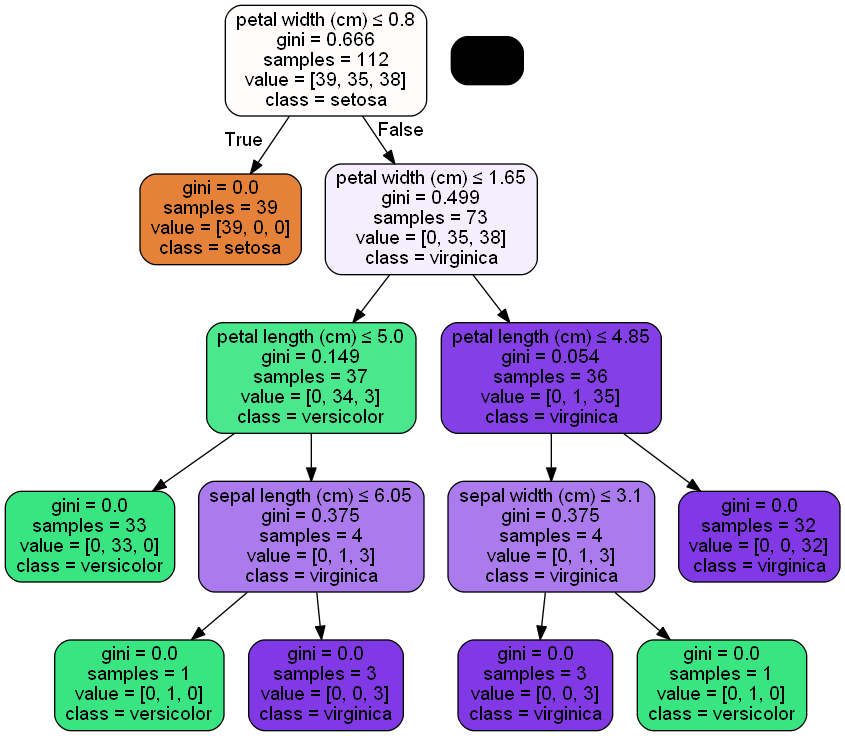

In [12]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from six import StringIO

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.feature_names,class_names=data.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [13]:
#prediction
y_pred = clf.predict(X_test)

# Answer 5- What is accuracy?
Accuracy of an algorithm is represented as the ratio of correctly classified patients (TP+TN) to the total number of patients (TP+TN+FP+FN).
Accuracy = (TP + TN)/(TP + TN + FP + FN)

# References
https://www.sciencedirect.com/topics/engineering/confusion-matrix

In [14]:
#Importing the accuracy metric from sklearn.metrics library
from sklearn.metrics import accuracy_score

In [15]:
print('Accuracy Score on train data (using Default criterionas gini): ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data (using Default criterionas gini): ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data (using Default criterionas gini):  1.0
Accuracy Score on test data (using Default criterionas gini):  0.9473684210526315


# Overfitting

I think there is no overfitting in our model. There is not much difference between the test score according to the train accuracy score of our model. If the test score was too low, it would be overfitting.

We can control overfitting by adjusting the depth of the tree.


# Answer 4- What is a confusion matrix?
A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

The confusion matrix consists of four basic characteristics (numbers) that are used to define the measurement metrics of the classifier. These four numbers are:

1.
TP (True Positive): TP represents the number of patients who have been properly classified to have malignant nodes, meaning they have the disease.

2.
TN (True Negative): TN represents the number of correctly classified patients who are healthy.

3.
FP (False Positive): FP represents the number of misclassified patients with the disease but actually they are healthy. FP is also known as a Type I error.

4.
FN (False Negative): FN represents the number of patients misclassified as healthy but actually they are suffering from the disease. FN is also known as a Type II error.

Performance metrics of an algorithm are accuracy, precision, recall, and F1 score, which are calculated on the basis of the above-stated TP, TN, FP, and FN.

# References
https://www.sciencedirect.com/topics/engineering/confusion-matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
cm

array([[11,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 11]], dtype=int64)

# Answer 6- What is precision?
Precision of an algorithm is represented as the ratio of correctly classified patients with the disease (TP) to the total patients predicted to have the disease (TP+FP).

Precision = TP/Predicted Positives = TP/(TP + FP)

# References 
https://www.sciencedirect.com/topics/engineering/confusion-matrix


# Answer 7- What is recall?
Recall metric is defined as the ratio of correctly classified diseased patients (TP) divided by total number of patients who have actually the disease.

Recall = TP/Real Positives = TP/(TP + FN)

Recall metric is defined as the ratio of correctly classified diseased patients (TP) divided by total number of patients who have actually the disease.

# References 
https://www.sciencedirect.com/topics/engineering/confusion-matrix

# Answer 8- What is f-1 score?
F1 score is also known as the F Measure. The F1 score states the equilibrium between the precision and the recall.

F1 score combines precision and recall relative to a specific positive class -The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0
F-1 score = 2 * (precision * recall) / (precision + recall)

# References
https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        15
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [18]:
# Changing the Criterion to Entropy
clf_entropy = DecisionTreeClassifier(criterion = 'entropy')

In [19]:
#Training the decision tree classifier. 
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
#Predicting labels on the test set.
y_pred_entropy =  clf_entropy.predict(X_test)

# Answer 3- What is Entropy?
Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.

Entropy is the degree of uncertainty, impurity or disorder of a random variable, or a measure of purity. It characterizes the impurity of an arbitrary class of examples.Here, if all elements belong to a single class, then it is termed as “Pure”, and if not then the distribution is named as “Impurity”.It is computed between 0 and 1, however, heavily relying on the number of groups or classes present in the data set it can be more than 1 while depicting the same significance i.e. extreme level of disorder.

# References
https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial




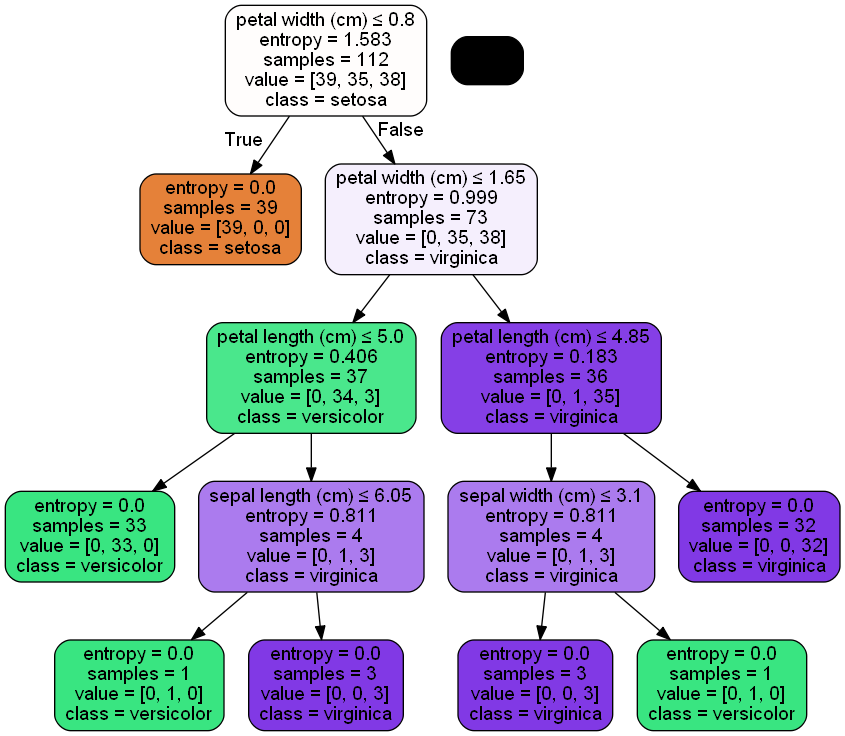

In [21]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from six import StringIO

dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.feature_names,class_names=data.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [22]:
print('Accuracy Score on train data (using Default criterion as Entropy): ', accuracy_score(y_true=y_train, y_pred =clf_entropy.predict(X_train)))
print('Accuracy Score on test data (using Default criterion as Entropy): ', accuracy_score(y_true=y_test, y_pred =y_pred_entropy))

Accuracy Score on train data (using Default criterion as Entropy):  1.0
Accuracy Score on test data (using Default criterion as Entropy):  0.9473684210526315


In [23]:
clf2 = DecisionTreeClassifier( min_samples_split=50)
clf2.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_split=50)

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[11  0  0]
 [ 0 14  1]
 [ 0  1 11]]


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        15
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

